# Sales Analysis

In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [112]:
sales_df = pd.read_csv("AusApparalSales4thQrt2020.csv")
sales_df.head()

,Date,Time,State,Group,Unit,Sales
0,1-Oct-2020,Morning,WA,Kids,8,20000
1,1-Oct-2020,Morning,WA,Men,8,20000
2,1-Oct-2020,Morning,WA,Women,4,10000
3,1-Oct-2020,Morning,WA,Seniors,15,37500
4,1-Oct-2020,Afternoon,WA,Kids,3,7500


## 1. Data Wrangling

In [113]:
sales_df.isnull().sum()

Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64

- Analysis - identifying the missing values
- this step was done to identify any missing values in the data set
- We can see that all are zeros which indicates no missing data
- Since there are no missing value we do not need to drop or fill any missing values

In [114]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    7560 non-null   object
 1   Time    7560 non-null   object
 2   State   7560 non-null   object
 3   Group   7560 non-null   object
 4   Unit    7560 non-null   int64 
 5   Sales   7560 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 354.5+ KB


### Data Normalisation

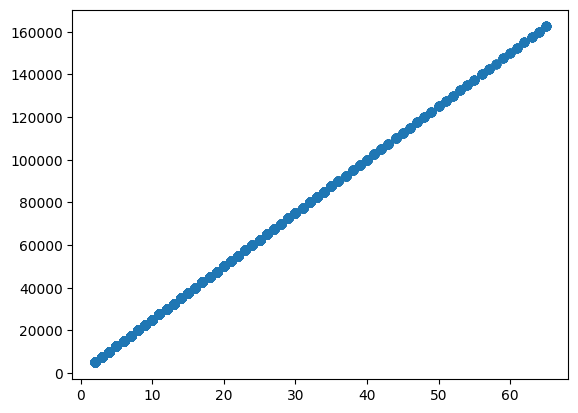

In [115]:
plt.scatter(sales_df['Unit'], sales_df['Sales'])

In [116]:
mm_scaler = MinMaxScaler()

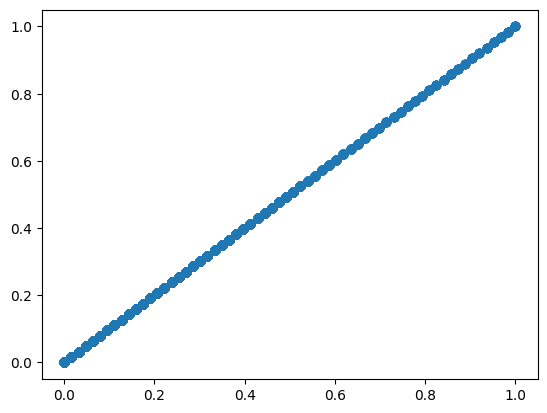

In [117]:
sales_df[['Sales_Normalized', 'Unit_Normalized']] = mm_scaler.fit_transform(sales_df[['Sales', 'Unit']])
plt.scatter(sales_df['Unit_Normalized'], sales_df['Sales_Normalized'])

### Insights

- 1. Calculating the total sales per state and sorting in descending order of sales
- 2. Calculating the total sales per category of clothing and sorting them in order of descending order of groups
- 3. Calculating the total sales in accordance to time


In [118]:
sales_df.groupby('State').agg({'Sales': 'sum'}).sort_values(by='Sales', ascending=False)

,Sales
State,
VIC,105565000
NSW,74970000
SA,58857500
QLD,33417500
TAS,22760000
NT,22580000
WA,22152500


here we can see VIC state has the highest sales

In [119]:
sales_df.groupby('Group').agg({'Sales': 'sum'}).sort_values(by='Sales', ascending=False)

,Sales
Group,
Men,85750000
Women,85442500
Kids,85072500
Seniors,84037500


men category has more sales here

In [120]:
sales_df.groupby('Time').agg({'Sales': 'sum'}).sort_values(by='Sales', ascending=False)

,Sales
Time,
Morning,114207500
Afternoon,114007500
Evening,112087500


morning and afternoon sales are same, evening sales are a little lower

## 2. Data Analysis

In [121]:
# calculating mean, median, mode and standard deviation on sales and unit columns

print("Descriptive Statistics for Sales:")
print(f"Mean: {sales_df['Sales'].mean()}")
print(f"Median: {sales_df['Sales'].median()}")
print(f"Mode: {sales_df['Sales'].mode()[0]}")
print(f"Standard Deviation: {sales_df['Sales'].std()}")

print("\nDescriptive Statistics for Unit:")
print(f"Mean: {sales_df['Unit'].mean()}")
print(f"Median: {sales_df['Unit'].median()}")
print(f"Mode: {sales_df['Unit'].mode()[0]}")
print(f"Standard Deviation: {sales_df['Unit'].std()}")



Descriptive Statistics for Sales:
Mean: 45013.5582010582
Median: 35000.0
Mode: 22500
Standard Deviation: 32253.506943966073

Descriptive Statistics for Unit:
Mean: 18.00542328042328
Median: 14.0
Mode: 9
Standard Deviation: 12.90140277758643


Here we can see the mean is higher than median for sales stats which indicates right-skewed sales distribution

In [122]:
sales_df.groupby('Group')['Sales'].sum().sort_values(ascending=False)

Group
Men        85750000
Women      85442500
Kids       85072500
Seniors    84037500
Name: Sales, dtype: int64

here we can see men have highest sales and lowest is for seniors

In [123]:
sales_df_group = sales_df.groupby('Group')['Sales'].sum().sort_values(ascending=False)
print(f"Highest Sales Group: {sales_df_group.idxmax()} ({sales_df_group.max():,.0f})")
print(f"Lowest Sales Group: {sales_df_group.idxmin()} ({sales_df_group.min():,.0f})")

Highest Sales Group:  Men (85,750,000)
Lowest Sales Group:  Seniors (84,037,500)


In [124]:
sales_df['Date'] = pd.to_datetime(sales_df['Date'], format='%d-%b-%Y')

sales_df['Week'] = sales_df['Date'].dt.isocalendar().week
sales_df['Month'] = sales_df['Date'].dt.month
sales_df['Quarter'] = sales_df['Date'].dt.quarter

weekly_sales = sales_df.groupby('Week')['Sales'].sum().sort_values(ascending=False)
monthly_sales = sales_df.groupby('Month')['Sales'].sum().sort_values(ascending=False)
quarterly_sales = sales_df.groupby('Quarter')['Sales'].sum().sort_values(ascending=False)

print("\nWeekly Sales Report:")
print(weekly_sales)

print("\nMonthly Sales Report:")
print(monthly_sales)

print("\nQuarterly Sales Report:")
print(quarterly_sales)



Weekly Sales Report:
Week
52    31770000
51    31655000
50    31525000
49    29622500
41    27002500
43    26815000
42    26640000
44    21807500
48    21477500
46    21172500
47    21112500
45    20865000
40    15045000
53    13792500
Name: Sales, dtype: int64

Monthly Sales Report:
Month
12    135330000
10    114290000
11     90682500
Name: Sales, dtype: int64

Quarterly Sales Report:
Quarter
4    340302500
Name: Sales, dtype: int64


- analysis
- highest weekly stats in week 52
- highest monthly revenue when month is 12

## Data Visualisation

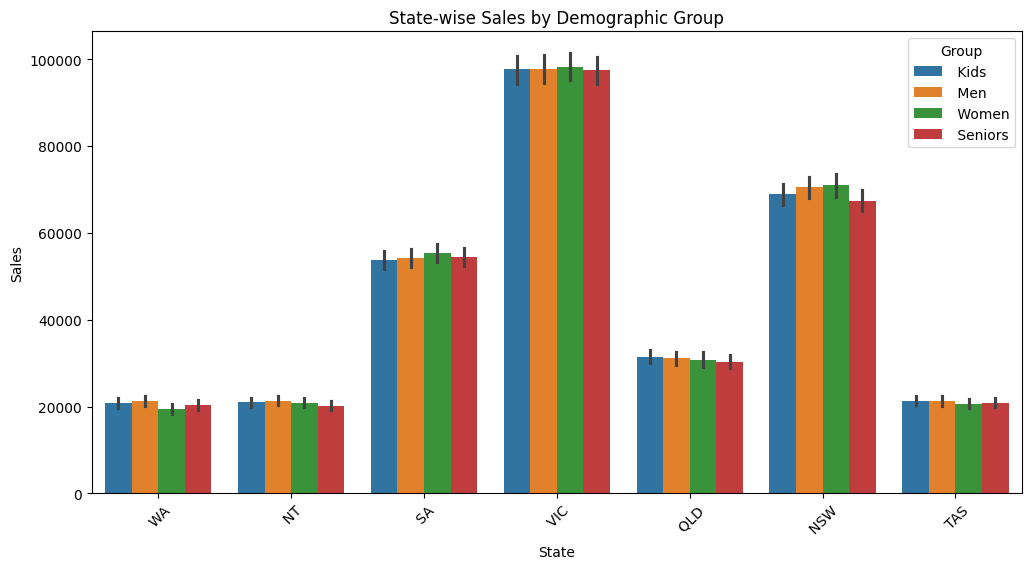

In [125]:
plt.figure(figsize=(12, 6))
sns.barplot(x='State', y='Sales', hue='Group', data=sales_df)
plt.title('State-wise Sales by Demographic Group')
plt.xticks(rotation=45)
plt.legend(title="Group")
plt.show()

This is to identify stats for each state and we gave hue for groups to understand the distribution, since its for 2 variables chose bar plot

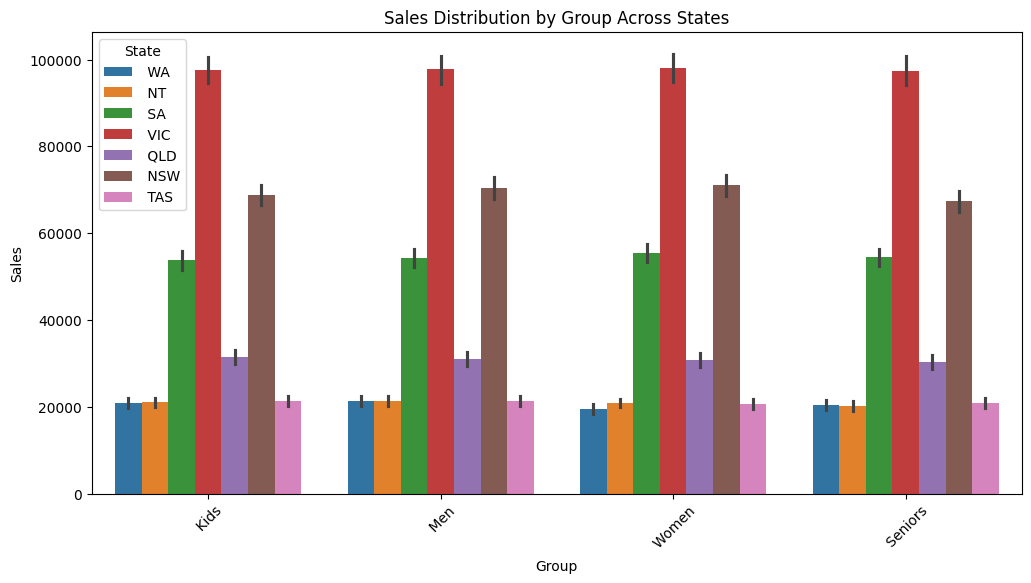

In [126]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Group', y='Sales', hue='State', data=sales_df)
plt.title('Sales Distribution by Group Across States')
plt.xticks(rotation=45)
plt.legend(title="State")
plt.show()

This is to identify the sales performance across groups, gave hues for states to understand the distribution, again since its 2 variables used bar plot 

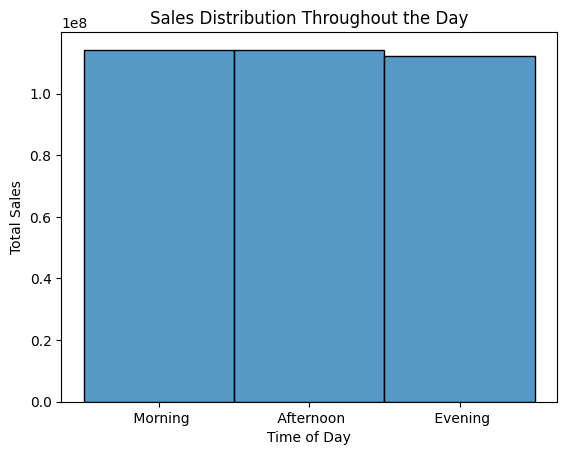

In [127]:
sns.histplot(sales_df, x='Time', weights='Sales', bins=3)
plt.title('Sales Distribution Throughout the Day')
plt.xlabel('Time of Day')
plt.ylabel('Total Sales')
plt.show()

Used a histogram as only 1 variable is analysed

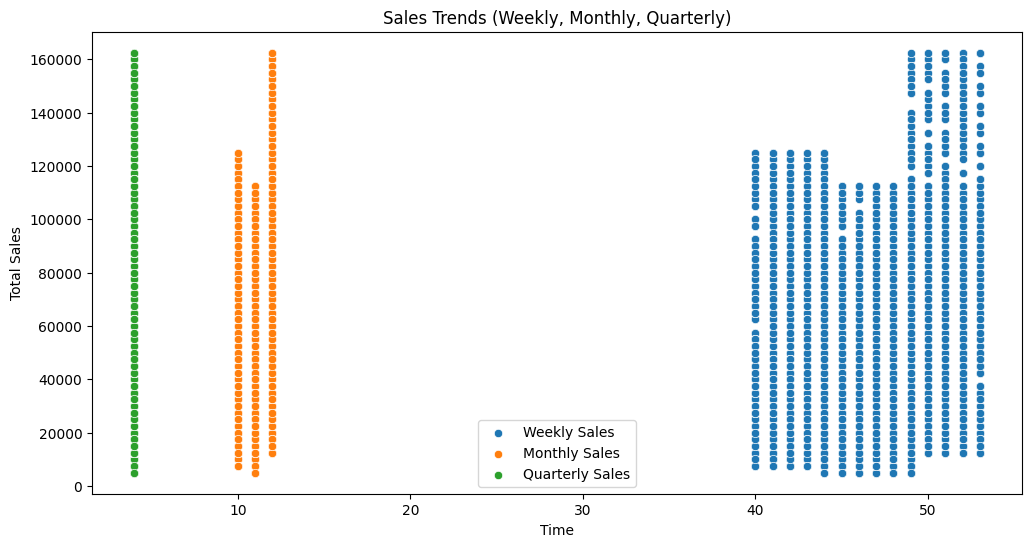

In [128]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Week', y='Sales', data=sales_df, label='Weekly Sales')
sns.scatterplot(x='Month', y='Sales', data=sales_df, label='Monthly Sales')
sns.scatterplot(x='Quarter', y='Sales', data=sales_df, label='Quarterly Sales')
plt.title('Sales Trends (Weekly, Monthly, Quarterly)')
plt.xlabel('Time')
plt.ylabel('Total Sales')
plt.legend()
plt.show()

Used scatter plot as it indicates the outliers and distribution

### Outlier Detection

<Axes: >

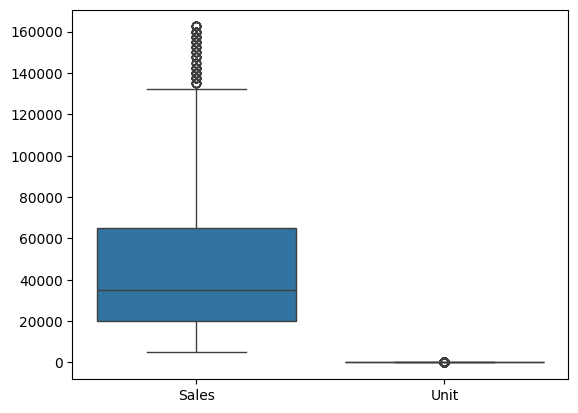

In [129]:
# Box Plot for Sales and Unit
sns.boxplot(data=sales_df[['Sales', 'Unit']])


We can see sales has an outlier

In [130]:
def outlier_treatment(column):
    # function for outlier treatment
    # q1 is 25th percentile
    # q3 is 75th percentile
    q1, q3 = np.percentile(column, [25, 75])
    # find IQR
    iqr = q3 - q1
    # 1.5 IQR rule
    # whatever is beyond 1.5 IQR range is outliers
    lower = q1 - (1.5 * iqr)
    upper = q3 + (1.5 * iqr)

    return lower, upper

In [131]:
lower, upper = outlier_treatment(sales_df['Sales'])

sales_df_cleaned = sales_df[(sales_df['Sales'] >= lower) & (sales_df['Sales'] <= upper)]


<Axes: ylabel='Sales'>

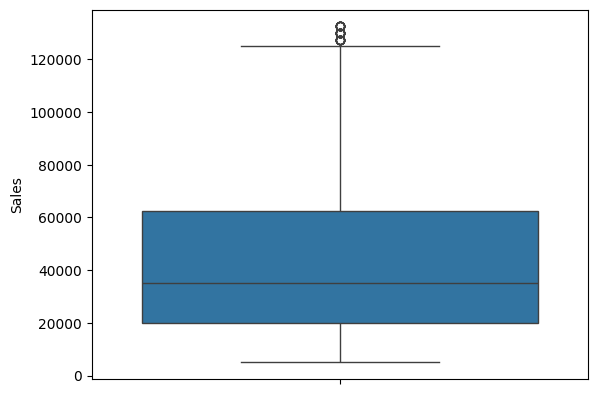

In [132]:
sns.boxplot(data=sales_df_cleaned['Sales'])


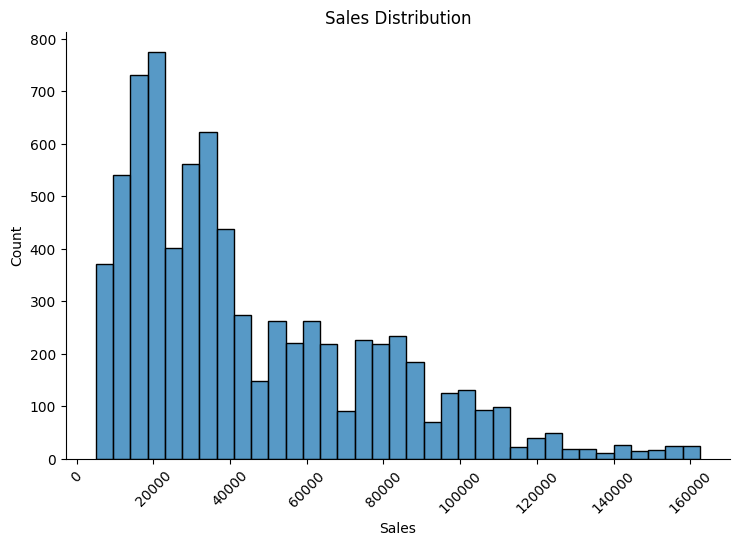

In [135]:
sns.displot(x='Sales', data=sales_df, aspect=1.5)
plt.xlabel("Sales")
plt.ylabel("Count")
plt.title("Sales Distribution")
plt.xticks(rotation=45)  # Rotating for better readability if needed
plt.show()


here we can see data is right skewed for sales